# Table of contents
1. [Introduction](#introduction)
2. [Function 1: ``find_directory_file()``](#paragraph1)
    1. [Creating Help Documentation](#subparagraph1)
3. [Function 2: ``load_file()``](#paragraph2)
4. [Appendix: Full Code for Functions](#paragraph3)

## Introduction <a name="introduction"></a>

Before working with your data, we will need to ingest your data into Python. We will be creating two functions:

- One function to parse the correct path to the file you are using
- One function to actually the file into Python

In [16]:
import glob
import os
import pandas as pd
import numpy as np
import datetime

DIRECTORY_LOCATION = r'C:/Users/Kevin/Desktop/Data'
print(f"Database directory is {DIRECTORY_LOCATION}")

Database directory is C:/Users/Kevin/Desktop/Data


## Function 1: ``find_directory_file()`` <a name="paragraph1"></a>

Using the ``glob`` package, we can utilize its string-matching capabilities to locate our file. It is very common for analysts to work with files that are updated daily, weekly or monthly for the purposes of reporting. Since we are using a common working directory, it is important we read the correct file.

Since there could be multiple files with similar names, potentially appending with the date it is pulled, we need to create a statement where it will read the newest file in your folder; most likely the one you pulled to utilize the functions you are about to create.

In [7]:
# Lets define our function:
def find_directory_file(string_search=''):
    csv_file_list = glob.glob(DIRECTORY_LOCATION + "\*.csv") # use glob to match filename
    files_list = [i for i in csv_file_list if string_search in i]
    num_found_files = len(files_list)

The above function will attempt to search for the string in your working directory. It will then pull a list of all files that matches. Depending on how much it pulled, we will need to do the following:

- **Pulled 0 matching files**: Function raises an exception, notifies the user, and ends
- **Pulled 1 matching file**: Function will read in the file location
- **Pulled >1 matching file**: Function will read the newest file based on your systems' date modified date on the files

In [10]:
def find_directory_file(string_search=''):
    csv_file_list = glob.glob(DIRECTORY_LOCATION + "\*.csv") # use glob to match filename
    files_list = [i for i in csv_file_list if string_search in i]
    num_found_files = len(files_list)

    # Situation 1: no files found
    if num_found_files == 0:
        raise Exception(f'Could not find the {string_search} file in your directory folder.')
        
    # Situation 2: more than one matching found
    elif num_found_files > 1:
        files_list.sort(key=lambda x: os.path.getmtime(x), reverse=True) # use the most recent file
        print(f'Found more than one {string_search} file. Will use the most recent file based on "Date Modified" on your computer.')
        directory, file = os.path.split(files_list[0])
        print(f'Using directory file: {file}')
        return files_list[0]
    
    # Situation 3: one file found
    else:
        directory, file = os.path.split(files_list[0])
        print(f'Using directory file: {file}')
        return files_list[0]
    
    print()

Now that we've created a function that will return a string of the correct folder path to our target file, lets create a function that actually reads-in the file to Python.

### Creating Help Documentation <a name="subparagraph1"></a>

It is important to create documentation within each function to give users context on how the function works. While you may understand the function as the creator, other users may need assistance on understanding how the parameters work, or even what the function actually does.

To create help documentation, it is recommended immediately after defining your function, you create a comment block by using triple quotes. IDEs like Spyder will automatically set up your documentation once you've started typing the three quotes.

**Note: I've omitted most of the code in the function to save space for this example**

In [3]:
def find_directory_file(string_search=''):
    """
    Place your help documentation in here
    """
    
    csv_file_list = glob.glob(DIRECTORY_LOCATION + "\*.csv") # use glob to match filename
    files_list = [i for i in csv_file_list if string_search in i]
    num_found_files = len(files_list)

Place your information in the triple quotes. Depending on your IDE, there are different keyboard shortcuts to viewing this information. On Jupyter, use ``shift+tab`` to view the documentation for your function. The result looks something like this:

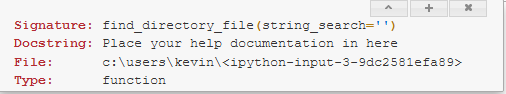

Lets insert the full help documentation for the function and see what it looks like from Jupyter, as well as the Spyder IDE.

In [4]:
def find_directory_file(string_search=''):
    """
    
    Attempts to find a file in your current directory folder. It will use the passed parameter, ``search_string`` on all files in your directory folder.
    
    You do not need to ensure the whole file name is inputted into the ``search_string`` parameter, only a portion is needed if the name is unique enough.
    
    If there is more than one file found, it will use the most recent file based on the "Modified time" according to your operating system's timestamp on the file
    
    Parameters
    ----------
    **string_search** : string
    
    
    Example of how to use this function.
    
        ``games_file = find_directory_file(my_data_file)``
    
    If you work with files that is appended the date at the end based on when you've extracted it, then you could omit the date portion of the file.
   
    As an example, if you have a file named Games_Jan252020.csv, you could do the following.
        
        ``games_file = find_directory_file(Games_)``

    Returns
    -------
    string
        The path and filename of the file if found, otherwise, an exception will be raised.

    """
    
    csv_file_list = glob.glob(DIRECTORY_LOCATION + "\*.csv") # use glob to match filename
    files_list = [i for i in csv_file_list if string_search in i]
    num_found_files = len(files_list)

Heres what it looks like on Jupyter:

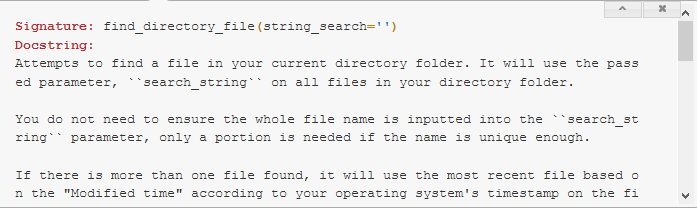

And here is the result on Spyder:

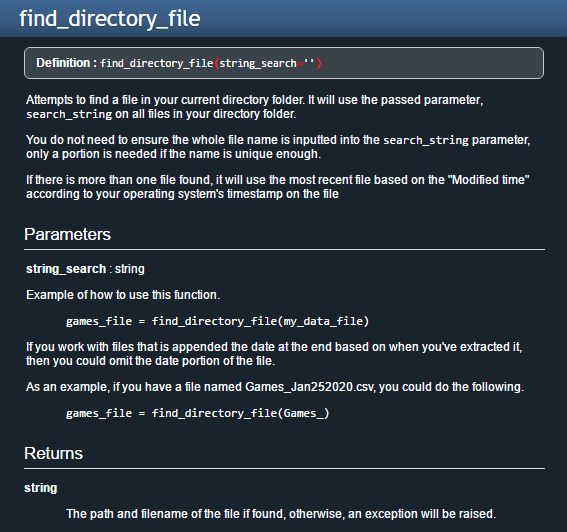

## Function 2: ``load_file()`` <a name="paragraph2"></a>

Once we have the correct file destination, we can utilize pandas ``pd.read_csv()`` function to read in our file.

In [ ]:
def load_file(filename):
    """
    
    Attempts to load a csv file. The passed parameter, ``filename``, should be obtained by calling ``find_directory_file()``.
    
    If you already know the filename, then you could provide your own filename. 
    
    In addition, this function will remove any rows in the data that have no data (NA)

    Parameters
    ----------
    **filename**: string
    
    Example of how to use this function.
        
        ``df = load_file('my_file_name.csv')``
        
    OR you could use the ``find_directory_file()`` function
        
        ``file_name = find_directory_file(your_file_name.csv)``
        
        ``df = load_file(file_name)``

    Returns
    -------
    DataFrame
        A DataFrame representing the contents of the passed parameter 'filename'

    """
    
    df = pd.read_csv(filename)
    df.dropna(how='all', inplace=True) # remove rows with no data
    return df

The above function will read in the file you've placed for the filename parameter. This function can be used in conjuction with our first created function, ``find_directory_file()``. Heres an example:

In [18]:
# If you're file name is vgsales.csv, you can do the following:

# Step 1: Call find_directory_file to find the correct folder path. Place the result into the variable file_location
file_location = find_directory_file('vgsales')

# Step 2: Utilize load_file to read-in the file
df = load_file(file_location)

df.tail(3)

Using directory file: vgsales.csv


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


## Appendix: Full Code for Functions <a name="paragraph3"></a>

You can find the full code for the two functions created in this Notebook:

In [11]:
def find_directory_file(string_search=''):
    """
    
    Attempts to find a file in your current directory folder. It will use the passed parameter, ``search_string`` on all files in your directory folder.
    
    You do not need to ensure the whole file name is inputted into the ``search_string`` parameter, only a portion is needed if the name is unique enough.
    
    If there is more than one file found, it will use the most recent file based on the "Modified time" according to your operating system's timestamp on the file
    
    Parameters
    ----------
    **string_search** : string
    
    
    Example of how to use this function.
    
        ``games_file = find_directory_file(my_data_file)``
    
    If you work with files that is appended the date at the end based on when you've extracted it, then you could omit the date portion of the file.
   
    As an example, if you have a file named Games_Jan252020.csv, you could do the following.
        
        ``games_file = find_directory_file(Games_)``

    Returns
    -------
    string
        The path and filename of the file if found, otherwise, an exception will be raised.

    """
    
    csv_file_list = glob.glob(DIRECTORY_LOCATION + "\*.csv") # use glob to match filename
    files_list = [i for i in csv_file_list if string_search in i]
    num_found_files = len(files_list)
    
    # Situation 1: no files found
    if num_found_files == 0:
        raise Exception(f'Could not find the {string_search} file in your directory folder.')
        
    # Situation 2: more than one matching found
    elif num_found_files > 1:
        files_list.sort(key=lambda x: os.path.getmtime(x), reverse=True) # use the most recent file
        print(f'Found more than one {string_search} file. Will use the most recent file based on "Date Modified" on your computer.')
        directory, file = os.path.split(files_list[0])
        print(f'Using directory file: {file}')
        return files_list[0]
    
    # Situation 3: one file found
    else:
        directory, file = os.path.split(files_list[0])
        print(f'Using directory file: {file}')
        return files_list[0]
    
    print()

In [12]:
def load_file(filename):
    """
    
    Attempts to load a csv file. The passed parameter, ``filename``, should be obtained by calling ``find_directory_file()``.
    
    If you already know the filename, then you could provide your own filename. 
    
    In addition, this function will remove any rows in the data that have no data (NA)

    Parameters
    ----------
    **filename**: string
    
    Example of how to use this function.
        
        ``df = load_file('my_file_name.csv')``
        
    OR you could use the ``find_directory_file()`` function
        
        ``file_name = find_directory_file(your_file_name.csv)``
        
        ``df = load_file(file_name)``

    Returns
    -------
    DataFrame
        A DataFrame representing the contents of the passed parameter 'filename'

    """
    
    df = pd.read_csv(filename)
    df.dropna(how='all', inplace=True) # remove rows with no data
    return df